In [32]:
import pandas as pd
from pandas import Series, DataFrame
import datetime 
from datetime import datetime


In [33]:
import os
os.getcwd()

'/Users/chereowang27/NYCDSA/Python_Intro_Project'

In [34]:
disney_p = pd.read_csv('/Users/chereowang27/NYCDSA/Python_Intro_Project/data/disney_plus_shows.csv', header=0)
netflix = pd.read_csv('/Users/chereowang27/NYCDSA/Python_Intro_Project/data/netflix_list.csv', header=0)

#convert added at date from str to datetime, make variable for the year, and month-year
disney_p['added_at'] = disney_p["added_at"].apply(lambda s: datetime.strptime(s, "%d-%b-%y"))
disney_p['added_atyear'] = disney_p['added_at'].apply(lambda s: s.strftime('%y'))
disney_p['added_atmonth_year'] = disney_p['added_at'].apply(lambda s: s.strftime('%b-%y'))
disney_p['added_atmonth_year_new'] = pd.to_datetime(disney_p['added_atmonth_year'], format = '%b-%y')

#convert runtime & imdb_rating to numeric
disney_p['runtime'] = disney_p['runtime'].str.split(' ')
disney_p['runtime'] = [pd.to_numeric(val[0:1]) if hasattr(val, '__iter__') else None for val in disney_p["runtime"]]

disney_p['data'] = 'Disney_plus'
netflix['data'] = 'Netflix'
#disney_p['added_atmonth_year'] =  disney_p['added_atyear'].apply(lambda s: datetime.date(s.month, s.year))

hyphen = disney_p['year'].str.split(pat = '-', expand = True ).loc[30,0][4]
df_year = disney_p['year'].str.split(pat = hyphen, expand = True ) \
            .rename(columns = {0:'yearStart', 1: 'yearEnd'})
       

disney_p = pd.concat([disney_p,df_year], axis = 1)

#count the number of movies in each genre
d_movie = disney_p[disney_p['type']=='movie']


In [41]:
genres = set(d_movie['genre'].str.cat(sep = ', ').split(', '))


In [42]:
# This counts the number of titles in each genre
def g_count(col,gn):
    return col.str.contains(gn).sum()

In [43]:
# This generates a data frame of counts of each genre by time (either month or year)
def agg_df(group):
    agg_df = []
    for gn in genres:
        tmp = d_movie.groupby(group).agg(
            **{gn : ('genre', lambda col: g_count(col,gn))}
        )
        agg_df.append(tmp)
    df_agg = pd.concat(agg_df, axis=1).apply(lambda col: col.cumsum())
    return df_agg

In [44]:
#df_agg = pd.concat(agg_df, axis=1).apply(lambda col: col.cumsum())

df_by_month_year = agg_df('added_atmonth_year_new')
df_by_year = agg_df('added_atyear')

In [45]:
df_by_year_T = df_by_year.T.reset_index()
df_by_year_T.columns = ['genre', '2019', '2020']
df_by_year_T

,genre,2019,2020
0,Musical,104,108
1,Family,470,530
2,News,1,1
3,Reality-TV,2,2
4,Mystery,19,22
5,Animation,226,260
6,Fantasy,185,201
7,Horror,7,8
8,Short,86,113
9,Drama,134,146


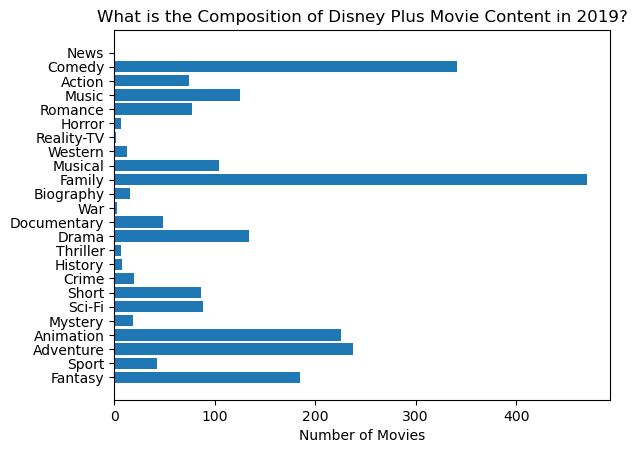

In [31]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(df_by_year_T['genre'], df_by_year_T['2019'], align='center')
ax.set_yticks(df_by_year_T['genre'])
ax.set_yticklabels(df_by_year_T['genre'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Movies')
ax.set_title('What is the Composition of Disney Plus Movie Content in 2019?')

plt.show()

<ipython-input-30-363e2a590c7c>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[Text(0.5, 23.52222222222222, 'Month-year when these movies were added onto Disney Plus'),
 Text(38.097222222222214, 0.5, 'Number of Movies'),
 Text(0.5, 1.0, 'Disney Maintains Competetive Edge in its Own Niche')]

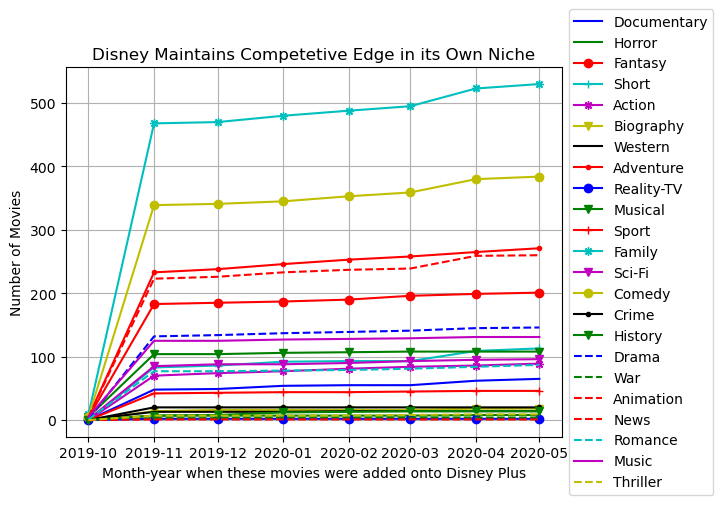

In [30]:
import matplotlib.pyplot as plt
x = df_by_month_year.index
fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(x,df_by_month_year['Documentary'], c = 'b', label = 'Documentary' )
ax.plot(x,df_by_month_year['Horror'], c = 'g', marker = "", label ='Horror')
ax.plot(x,df_by_month_year['Fantasy'], c = 'r', marker = "o", label ='Fantasy')
ax.plot(x,df_by_month_year['Short'], c = 'c', marker = "+",label ='Short')
ax.plot(x,df_by_month_year['Action'], c = 'm', marker = (8,2,0), label ='Action')
ax.plot(x,df_by_month_year['Biography'], c = 'y', marker = 'v', label = 'Biography')
ax.plot(x,df_by_month_year['Western'], c = 'k', ls = '-', label = 'Western')
ax.plot(x,df_by_month_year['Adventure'], c = 'r', marker = ".",label = 'Adventure' )
ax.plot(x,df_by_month_year['Reality-TV'], c = 'b', marker = "o", label ='Reality-TV' )
ax.plot(x,df_by_month_year['Musical'], c = 'g', marker = "v", label = 'Musical')
ax.plot(x,df_by_month_year['Sport'], c = 'r', marker = "+", label = 'Sport')
ax.plot(x,df_by_month_year['Family'], c = 'c', marker = (8,2,0), label = 'Family')
ax.plot(x,df_by_month_year['Sci-Fi'], c = 'm', marker = "v", label = 'Sci-Fi')
ax.plot(x,df_by_month_year['Comedy'], c = 'y', marker = "o", label = 'Comedy')
ax.plot(x,df_by_month_year['Crime'], c = 'k', marker = '.', label = 'Crime')
ax.plot(x,df_by_month_year['History'], c = 'g', marker = "v", label = 'History')
ax.plot(x,df_by_month_year['Drama'], c = 'b', ls = '--', label = 'Drama')
ax.plot(x,df_by_month_year['War'], c = 'g', ls = '--', label = 'War')
ax.plot(x,df_by_month_year['Animation'], c = 'r', ls = '--', label = 'Animation')
ax.plot(x,df_by_month_year['News'], c = 'r', ls = '--', label = 'News')
ax.plot(x,df_by_month_year['Romance'], c = 'c', ls = '--', label = 'Romance')
ax.plot(x,df_by_month_year['Music'], c = 'm', ls = '-', label = 'Music')
ax.plot(x,df_by_month_year['Thriller'], c = 'y', ls = '--', label = 'Thriller')


ax.grid()
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.draw()

ax.set(xlabel = "Month-year when these movies were added onto Disney Plus", 
       ylabel = "Number of Movies",
       title = "Disney Maintains Competetive Edge in its Own Niche")

In [10]:
d_movie.groupby('added_atyear').median()['imdb_rating']

added_atyear
19    6.7
20    6.8
Name: imdb_rating, dtype: float64

In [72]:
nf_movie = netflix[(netflix['type']=='movie')|(netflix['type']=='tvMovie')&(netflix['startYear'] < 2020)].rename(columns={'genres':'genre','startYear': 'added_atyear'})
nf_movie['added_atyear']
nf_movie.head()
genres = set(nf_movie['genre'].str.cat(sep = ',').split(','))
nf_movie.head()

nf_movie['added_atyear'] = nf_movie['added_atyear'].apply(lambda x: str(x))
nf_movie.head()

,imdb_id,title,popular_rank,certificate,added_atyear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genre,isAdult,cast,image_url,data
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...,Netflix
15,tt6111574,The Woman in the Window,16,18,2021.0,NaN,NaN,100,movie,United States,English,An agoraphobic woman living alone in New York ...,"Living in denial, the depressed, pill-popping ...",5.7,46703.0,"Crime,Drama,Mystery",0,"['Amy Adams', 'Gary Oldman', 'Anthony Mackie',...",https://m.media-amazon.com/images/M/MV5BYmVlNW...,Netflix
17,tt7979580,The Mitchells vs the Machines,18,13,2021.0,NaN,NaN,113,movie,United States,English,"A quirky, dysfunctional family's road trip is ...",An animated action-comedy about an ordinary fa...,7.8,55762.0,"Adventure,Animation,Comedy",0,"['Abbi Jacobson', 'Danny McBride', 'Maya Rudol...",https://m.media-amazon.com/images/M/MV5BMjdkZj...,Netflix
18,tt7084386,Blue Miracle,19,13,2021.0,NaN,NaN,95,movie,United States,English,"To save their cash-strapped orphanage, a guard...","To save their cash-strapped orphanage, a guard...",6.7,2962.0,"Adventure,Biography,Drama",0,"['Dennis Quaid', 'Jimmy Gonzales', 'Dana Wheel...",https://m.media-amazon.com/images/M/MV5BMGRkNz...,Netflix
21,tt6772524,Trouble,22,7,2019.0,NaN,NaN,87,movie,Canada,English,A pampered dog named Trouble must learn to liv...,A pampered dog named Trouble must learn to liv...,5.9,2131.0,"Adventure,Animation,Comedy",0,"['Big Sean', 'Pamela Adlon', 'Lucy Hale', 'Mar...",https://m.media-amazon.com/images/M/MV5BYzk5NT...,Netflix


In [73]:
# This counts the number of titles in each genre
def g_count(col,gn):
    return col.str.contains(gn).sum()

# This generates a data frame of counts of each genre by time (either month or year)
def agg_df(group):
    agg_df = []
    for gn in genres:
        tmp = nf_movie.groupby(group).agg(
        **{gn : ('genre', lambda col: g_count(col,gn))}
        )
        agg_df.append(tmp)
    df_agg = pd.concat(agg_df, axis=1).apply(lambda col: col.cumsum())
    return df_agg

In [76]:
#agg_df('added_atyear')
agg_df('added_atyear')

error: missing { at position 2